In [7]:
import pandas as pd

In [8]:
data = pd.read_csv("/kaggle/input/bontest/df1.csv",index_col = 0)

In [9]:
data = data.drop(["summary"], axis = 1)

In [10]:
from sklearn.model_selection import train_test_split
df, rest = train_test_split(data, train_size = 2500)

In [ ]:
new_df = df.pivot(columns = "asin", values = 'overall',index = "reviewerID")

In [55]:
new_df.isna().sum(axis = 0)/new_df.shape[1]<0.4

asin
0002007770    True
0002247399    True
0004111176    True
0006511252    True
0007101147    True
              ... 
B00KTK56P0    True
B00KUT22PW    True
B00L9OV80W    True
B00LF3RDMY    True
B00LHWD0UM    True
Length: 2424, dtype: bool

<AxesSubplot:xlabel='asin'>

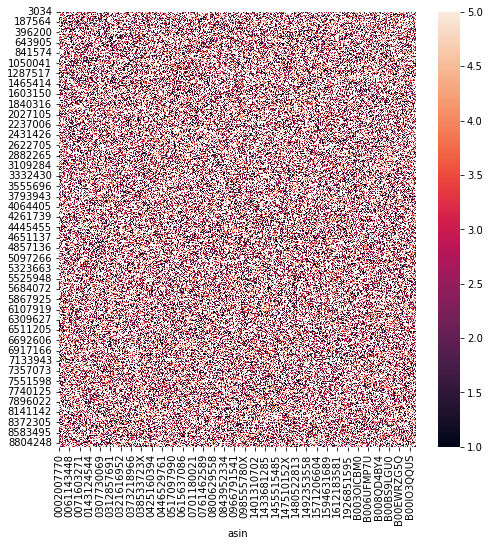

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.heatmap(new_df)

#### __Question b.i__
Eormons la base de données

In [57]:
def DataSelection(dataframe):
    valeur = randint(10,20)
    for col in range(0,dataframe.shape[0]):
        for i in range(0,valeur):
            index = randint(0,dataframe.shape[1]-1)
            if dataframe.iloc[col,index] == np.nan :
                pass
            else:
                dataframe.iloc[col,index] = np.nan
    return dataframe

In [58]:
dataframe1 = DataSelection(new_df)

In [59]:
df1 = DataSelection(new_df)
df2 = DataSelection(new_df)
df3 = DataSelection(new_df)

In [61]:
corr1 = df1.corr(method ='pearson')
corr2 = df2.corr(method ='pearson')
corr3 = df3.corr(method ='pearson')

<AxesSubplot:xlabel='asin', ylabel='asin'>

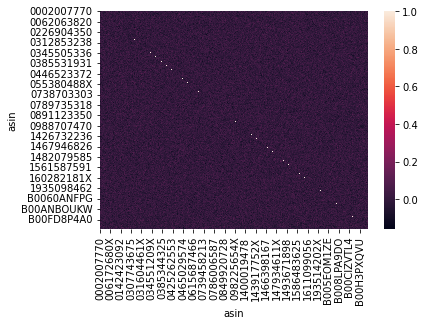

In [62]:
sns.heatmap(DataSelection(df).corr(method = 'pearson'))

In [ ]:
df1_transpose = df1.transpose()
df2_transpose = df2.transpose()
df3_transpose = df3.transpose()

In [ ]:
corr_reviewers_1 = df1_transpose.corr(method ='pearson')
corr_reviewers_2 = df2_transpose.corr(method ='pearson')
corr_reviewers_3 = df3_transpose.corr(method ='pearson')

In [ ]:
sns.heatmap(DataSelection(df).transpose().corr(method = 'pearson'))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
df1_scale = StandardScaler().fit_transform(corr1)
kmeans_1 = KMeans(n_clusters = 3)
kmeans_1.fit(df1_scale)
y_1 = kmeans_1.labels_

In [ ]:
df2_scale = StandardScaler().fit_transform(corr2)
kmeans_2 = KMeans(n_clusters = 3)
kmeans_2.fit(df2_scale)
y_2 = kmeans_2.labels_

In [ ]:
df3_scale = StandardScaler().fit_transform(corr3)
kmeans_3 = KMeans(n_clusters = 3)
kmeans_3.fit(df2_scale)
y_3 = kmeans_3.labels_x

In [ ]:
df1_reviewer_scale = StandardScaler().fit_transform(corr_reviewers_1)
kmeans_4 = KMeans(n_clusters = 8)
kmeans_4.fit(df1_reviewer_scale)
y_4 = kmeans_4.labels_

In [ ]:
df2_reviewer_scale = StandardScaler().fit_transform(corr_reviewers_2)
kmeans_5 = KMeans(n_clusters = 8)
kmeans_5.fit(df2_reviewer_scale)
y_5 = kmeans_5.labels_

In [ ]:
df3reviewer_scale = StandardScaler().fit_transform(corr_reviewers_3)
kmeans_6= KMeans(n_clusters = 8
kmeans_6fit(df3reviewer_scale)
y_6 kmeans_6.labels_

In [63]:
data_final = df1 + df2 +df3

In [88]:
def caclulR(data,i,j):
    for i in range(0, data.shape[1]):
        if data.iloc[i,j] == np.nan :
            data.iloc[i,j] = 0
    for col in range(0,data.shape[1]):
        x = data.iloc[col,:]
    return x

In [91]:
def eval_R(n,p,data):
    somme = 0
    for i in range(0,n):
        for j in range(0,p):
            somme = caclulR(data,i,j)-data.iloc[i,j] + somme
    return somme/(n*p)  

In [89]:
caclulR(data_final,10,20)

asin
0002007770    6.0
0002247399    6.0
0004111176    9.0
0006511252    NaN
0007101147    NaN
             ... 
B00KTK56P0    9.0
B00KUT22PW    9.0
B00L9OV80W    NaN
B00LF3RDMY    9.0
B00LHWD0UM    NaN
Name: 8588373, Length: 2424, dtype: float64

In [ ]:
eval_R(2500 ,2424, data_final)

In [ ]:
from numpy import gradient
grandien = gradient(eval_R(2500 ,2424, data_final))

In [ ]:
#algorithme de Gradient Descent 
def gradient_descent(X, y, theta, learning_rate =0.001, iterations = 1000): 
     m = len(y) 
     cost_history = np.zeros(iterations) 
     theta_history = np.zeros((iterations, 2)) 

     for i in range(0, iterations):
        prediction = model(X, theta) 
     theta = theta - learning_rate * gradient(X, y, theta) 
     cost_history[i] = cost_function(X, y, theta) 
     theta_history[i,:] = theta.T 

     return theta, cost_history, theta_history